<a href="https://colab.research.google.com/github/ddovidovich/DataScienceLerning/blob/main/UNIT_01_DZ_ultra_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не 
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [1]:
# Ваше решение
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline 

In [2]:
# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [3]:
from tensorflow.keras.preprocessing import image
import PIL.ImageOps 

# загрузка и преобразование картинки
def load_image(filename):
    img = image.load_img(filename, target_size=(28, 28), color_mode = 'grayscale')
    img = PIL.ImageOps.invert(img)
    img = image.img_to_array(img).reshape(28,28)
    img = img/255
    img[img < 0.5] = 0
    img[img >= 0.5] = 1
    return img

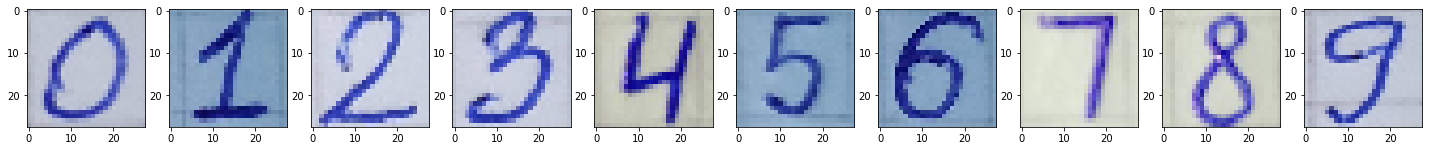

In [4]:
# Создание полотна из десяти графиков
fig, axs = plt.subplots(1, 10, figsize=(25, 5)) 
# Проход и отрисовка по всем классам
for i in range(10):
    img = image.load_img('num_' + str(i) + '.jpg', target_size=(28, 28)) 
    axs[i].imshow(img, cmap = 'gray')
# Вывод изображений
plt.show() 

In [5]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)   
x_test = x_test_org.reshape(x_test_org.shape[0], -1)   
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [6]:
# Задание константы количества распознаваемых классов

CLASS_COUNT = 10
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [7]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu')) 

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu')) 

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax')) 

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# Обучение модели
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=16,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/16
469/469 [==============================] - 7s 15ms/step - loss: 0.2036 - accuracy: 0.9395
Epoch 2/16
469/469 [==============================] - 5s 10ms/step - loss: 0.0745 - accuracy: 0.9769
Epoch 3/16
469/469 [==============================] - 5s 10ms/step - loss: 0.0462 - accuracy: 0.9855
Epoch 4/16
469/469 [==============================] - 5s 10ms/step - loss: 0.0344 - accuracy: 0.9887
Epoch 5/16
469/469 [==============================] - 5s 10ms/step - loss: 0.0240 - accuracy: 0.9921
Epoch 6/16
469/469 [==============================] - 5s 10ms/step - loss: 0.0214 - accuracy: 0.9925
Epoch 7/16
469/469 [==============================] - 5s 10ms/step - loss: 0.0179 - accuracy: 0.9942
Epoch 8/16
469/469 [==============================] - 5s 10ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 9/16
469/469 [==============================] - 5s 10ms/step - loss: 0.0165 - accuracy: 0.9947
Epoch 10/16
469/469 [==============================] - 5s 10ms/step - loss: 0.0140 - accura

Число: 0 . Cеть распознала: 0 ВЕРНО
Число: 1 . Cеть распознала: 3 НЕВЕРНО
Число: 2 . Cеть распознала: 7 НЕВЕРНО
Число: 3 . Cеть распознала: 3 ВЕРНО
Число: 4 . Cеть распознала: 4 ВЕРНО
Число: 5 . Cеть распознала: 5 ВЕРНО
Число: 6 . Cеть распознала: 5 НЕВЕРНО
Число: 7 . Cеть распознала: 3 НЕВЕРНО
Число: 8 . Cеть распознала: 8 ВЕРНО
Число: 9 . Cеть распознала: 7 НЕВЕРНО


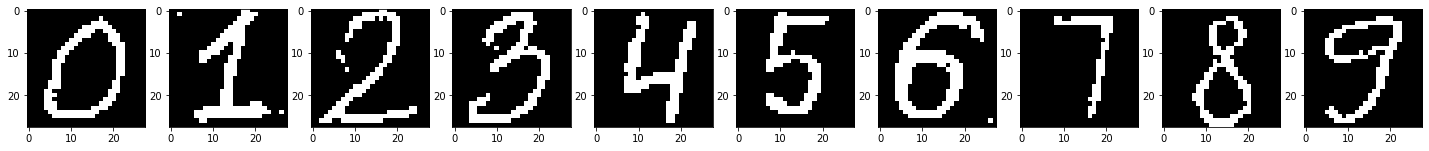

In [9]:
# Вывод для примера картинок по каждому классу

# Создание полотна из 10 графиков
fig, axs = plt.subplots(1, 10, figsize=(25, 5)) 
# Проход по всем классам
for i in range(10):
    # Отрисовка примеров
    img = load_image('num_' + str(i) + '.jpg') 
    axs[i].imshow(img, cmap = 'gray')
    # Вывод результатов распознавания
    result = 'НЕВЕРНО' if (i != np.argmax(model.predict(img.reshape(1, 784)))) else 'ВЕРНО'
    print('Число:', i, '. Cеть распознала:', np.argmax(model.predict(img.reshape(1, 784))), result)
# Вывод изображений
plt.show() 